In [1]:
#https://github.com/PacktPublishing/Geospatial-Data-Science-Quick-Start-Guide/blob/master/Chapter02/NYC%20Data.ipynb
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import geopandas as gpd
from sklearn import metrics
import seaborn as sns
#before importing fastai I got name error, "name 'add_datepart' is not defined "
#so upgraded fastai by code:  !pip install -U fastai than import fastai. tabular instead of fastai.structured
from fastai.tabular.all import *
#still add_datepart returns name error
from fastai.imports import *

In [2]:
df=pd.read_csv("2016_Green_Taxi_Trip_Data.csv")

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,8,11,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


#Data Exploratory bu klasordeki word dokumanından alınmıştır.
#Getting an overview of data 
In this article, I will explain the various steps involved in data exploration through simple explanations and Python code snippets. The key steps involved in data exploration are:
> Load data
> Identify variables
> Variable analysis
> Handling missing values
> Handling outliers
> Feature engineering

#Getting an overview of data 
titan.head() titan.tail() titan.sample(10)  
#identify variable type 
titan.dtypes titan.info() titan.describe()


In [3]:
#Getting an overview of data 

In [4]:
df.head(5)

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,PULocationID,DOLocationID
0,2,01/01/2016 12:29:24 AM,01/01/2016 12:39:36 AM,N,1.0,-73.928642,40.680611,-73.924278,40.698044,1.0,...,0.5,1.86,0.0,NaN,0.3,11.16,1.0,1.0,NaN,NaN
1,2,01/01/2016 12:19:39 AM,01/01/2016 12:39:18 AM,N,1.0,-73.952675,40.723175,-73.923920,40.761379,1.0,...,0.5,0.00,0.0,NaN,0.3,16.8,2.0,1.0,NaN,NaN
2,2,01/01/2016 12:19:33 AM,01/01/2016 12:39:48 AM,N,1.0,-73.971611,40.676105,-74.013161,40.646072,1.0,...,0.5,4.45,0.0,NaN,0.3,22.25,1.0,1.0,NaN,NaN
3,2,01/01/2016 12:22:12 AM,01/01/2016 12:38:32 AM,N,1.0,-73.989502,40.669579,-74.000648,40.689034,1.0,...,0.5,0.00,0.0,NaN,0.3,14.8,2.0,1.0,NaN,NaN
4,2,01/01/2016 12:24:01 AM,01/01/2016 12:39:22 AM,N,1.0,-73.964729,40.682854,-73.940720,40.663013,1.0,...,0.5,0.00,0.0,NaN,0.3,13.3,2.0,1.0,NaN,NaN


In [5]:
df.tail()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,PULocationID,DOLocationID
5997517,2,04/29/2016 07:50:19 PM,04/29/2016 08:06:06 PM,N,1.0,-73.90255,40.753708,-73.858955,40.7{,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5997518,"""error"" : true",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5997519,"""message"" : ""Internal error""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5997520,"""status"" : 500",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5997521,},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.sample(2)

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,PULocationID,DOLocationID
4551033,2,04/01/2016 12:29:53 PM,04/01/2016 12:37:02 PM,N,1.0,-73.890846,40.746956,-73.895264,40.762283,1.0,...,0.5,0.00,0.0,NaN,0.3,7.8,1.0,1.0,NaN,NaN
1660138,1,02/05/2016 06:22:46 PM,02/05/2016 06:28:53 PM,N,1.0,-73.995895,40.682236,-73.994530,40.667377,1.0,...,0.5,1.75,0.0,NaN,0.3,10.55,1.0,1.0,NaN,NaN


In [7]:
#Data Exploratory   identify variable type 
#(df.describe() df.info()  df.dtypes())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5997522 entries, 0 to 5997521
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               object 
 1   lpep_pickup_datetime   object 
 2   Lpep_dropoff_datetime  object 
 3   Store_and_fwd_flag     object 
 4   RateCodeID             float64
 5   Pickup_longitude       float64
 6   Pickup_latitude        float64
 7   Dropoff_longitude      float64
 8   Dropoff_latitude       object 
 9   Passenger_count        float64
 10  Trip_distance          float64
 11  Fare_amount            object 
 12  Extra                  float64
 13  MTA_tax                float64
 14  Tip_amount             float64
 15  Tolls_amount           float64
 16  Ehail_fee              float64
 17  improvement_surcharge  float64
 18  Total_amount           object 
 19  Payment_type           float64
 20  Trip_type              float64
 21  PULocationID           float64
 22  DOLocationID      

In [9]:
#handling missing values
#Determining percentage of missing values in each column of Data 
df.isna()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,PULocationID,DOLocationID
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5997517,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,True
5997518,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5997519,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5997520,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [10]:
#yaklaşık işareti option+ü 
#

In [11]:
df[~df.isna()]

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,PULocationID,DOLocationID
0,2,01/01/2016 12:29:24 AM,01/01/2016 12:39:36 AM,N,1.0,-73.928642,40.680611,-73.924278,40.698044,1.0,...,0.5,1.86,0.0,NaN,0.3,11.16,1.0,1.0,NaN,NaN
1,2,01/01/2016 12:19:39 AM,01/01/2016 12:39:18 AM,N,1.0,-73.952675,40.723175,-73.923920,40.761379,1.0,...,0.5,0.00,0.0,NaN,0.3,16.8,2.0,1.0,NaN,NaN
2,2,01/01/2016 12:19:33 AM,01/01/2016 12:39:48 AM,N,1.0,-73.971611,40.676105,-74.013161,40.646072,1.0,...,0.5,4.45,0.0,NaN,0.3,22.25,1.0,1.0,NaN,NaN
3,2,01/01/2016 12:22:12 AM,01/01/2016 12:38:32 AM,N,1.0,-73.989502,40.669579,-74.000648,40.689034,1.0,...,0.5,0.00,0.0,NaN,0.3,14.8,2.0,1.0,NaN,NaN
4,2,01/01/2016 12:24:01 AM,01/01/2016 12:39:22 AM,N,1.0,-73.964729,40.682854,-73.940720,40.663013,1.0,...,0.5,0.00,0.0,NaN,0.3,13.3,2.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5997517,2,04/29/2016 07:50:19 PM,04/29/2016 08:06:06 PM,N,1.0,-73.902550,40.753708,-73.858955,40.7{,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5997518,"""error"" : true",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5997519,"""message"" : ""Internal error""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5997520,"""status"" : 500",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.isna().sum()

VendorID                       0
lpep_pickup_datetime           4
Lpep_dropoff_datetime          4
Store_and_fwd_flag             4
RateCodeID                     4
Pickup_longitude               4
Pickup_latitude                4
Dropoff_longitude              4
Dropoff_latitude               4
Passenger_count                5
Trip_distance                  5
Fare_amount                    5
Extra                          5
MTA_tax                        5
Tip_amount                     5
Tolls_amount                   5
Ehail_fee                5997522
improvement_surcharge          5
Total_amount                   5
Payment_type                   5
Trip_type                    445
PULocationID             5997522
DOLocationID             5997522
dtype: int64

In [13]:
na_counts=pd.DataFrame(df.isna().sum()/len(df))

In [14]:
na_counts.head(2)

,0
VendorID,0.000000e+00
lpep_pickup_datetime,6.669421e-07


In [15]:
na_counts.columns=["null_row_pct"]    #sütun ismi

In [16]:
na_counts

,null_row_pct
VendorID,0.000000e+00
lpep_pickup_datetime,6.669421e-07
Lpep_dropoff_datetime,6.669421e-07
Store_and_fwd_flag,6.669421e-07
RateCodeID,6.669421e-07
Pickup_longitude,6.669421e-07
Pickup_latitude,6.669421e-07
Dropoff_longitude,6.669421e-07
Dropoff_latitude,6.669421e-07
Passenger_count,8.336776e-07


In [17]:
na_counts[na_counts.null_row_pct>0].sort_values(by="null_row_pct",ascending=False)

,null_row_pct
DOLocationID,1.000000e+00
PULocationID,1.000000e+00
Ehail_fee,1.000000e+00
Trip_type,7.419731e-05
MTA_tax,8.336776e-07
Payment_type,8.336776e-07
Total_amount,8.336776e-07
improvement_surcharge,8.336776e-07
Tolls_amount,8.336776e-07
Tip_amount,8.336776e-07


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RateCodeID,5997518.0,1.101444,1.031590,1.000000,1.000000,1.000000,1.000000,99.000000
Pickup_longitude,5997518.0,-73.814330,3.054081,-115.282494,-73.960663,-73.946449,-73.918854,0.000000
Pickup_latitude,5997518.0,40.678447,1.674992,0.000000,40.694530,40.746296,40.802181,43.168007
Dropoff_longitude,5997518.0,-73.823331,2.926228,-115.332214,-73.967789,-73.945389,-73.912323,0.000000
Passenger_count,5997517.0,1.355877,1.021940,0.000000,1.000000,1.000000,1.000000,9.000000
Trip_distance,5997517.0,2.778469,2.917234,0.000000,1.010000,1.820000,3.500000,832.200000
Extra,5997517.0,0.354013,0.383069,-4.500000,0.000000,0.500000,0.500000,83.000000
MTA_tax,5997517.0,0.486492,0.087307,-0.500000,0.500000,0.500000,0.500000,3.000000
Tip_amount,5997517.0,1.247729,2.551346,-60.000000,0.000000,0.000000,2.000000,499.990000
Tolls_amount,5997517.0,0.105806,1.130139,-30.000000,0.000000,0.000000,0.000000,902.170000


In [19]:
len(df)

5997522

In [20]:
#removing Dropoff_latitude and DOLocation id where both of them are missing
#iki özellikte aynı anda yoksa koordinatlara ulaşamayacağımızdan bu durumda olan satırları kaldıralım

df=df[~(df.Dropoff_latitude.isna())& (df.DOLocationID.isna())]

In [21]:
len(df)

5997518

In [30]:
#handling time values
#converting dtype of datetime first
df.Lpep_dropoff_datetime=pd.to_datetime(df.Lpep_dropoff_datetime)



AttributeError: 'DataFrame' object has no attribute 'Lpep_dropoff_datetime'

In [23]:
#çıktıyı gör
df.Lpep_dropoff_datetime

0         2016-01-01 00:39:36
1         2016-01-01 00:39:18
2         2016-01-01 00:39:48
3         2016-01-01 00:38:32
4         2016-01-01 00:39:22
                  ...        
5997513   2016-04-29 19:51:01
5997514   2016-04-29 19:12:44
5997515   2016-04-29 19:52:30
5997516   2016-04-29 19:40:00
5997517   2016-04-29 20:06:06
Name: Lpep_dropoff_datetime, Length: 5997518, dtype: datetime64[ns]

In [ ]:
df.lpep_pickup_datetime=pd.to_datetime(df.lpep_pickup_datetime)

In [ ]:
#pd.option_contex("display.max_rows",1000)
#pd.option_contex("display.max_columns",1000)

In [25]:
df["trip_duration"]=np.log((df.Lpep_dropoff_datetime-df.lpep_pickup_datetime).dt.seconds+1)

In [26]:
df.trip_duration.head(5)

0    6.418365
1    7.073270
2    7.103322
3    6.888572
4    6.826545
Name: trip_duration, dtype: float64

In [27]:

drop_columns=[
    "Trip_type ", "Ehail_fee", "Extra", "Payment_type", "Total_amount", 
    "improvement_surcharge", "Tolls_amount", "Tip_amount", 
    "MTA_tax", "VendorID", "RateCodeID", "Store_and_fwd_flag", 
    "Fare_amount", "Lpep_dropoff_datetime", 'Trip_type ', 'Passenger_count'
]
df.drop(columns=drop_columns, inplace=True)


In [28]:
df.columns

Index(['lpep_pickup_datetime', 'Pickup_longitude', 'Pickup_latitude',
       'Dropoff_longitude', 'Dropoff_latitude', 'Trip_distance',
       'PULocationID', 'DOLocationID', 'trip_duration'],
      dtype='object')

In [ ]:
#lpep_pickup yılını ayını vs ayırır.

In [29]:
add_datepart(df,"lpep_pickup_datetime", time=True)

,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Trip_distance,PULocationID,DOLocationID,trip_duration,lpep_pickup_datetimeYear,lpep_pickup_datetimeMonth,...,lpep_pickup_datetimeIs_month_end,lpep_pickup_datetimeIs_month_start,lpep_pickup_datetimeIs_quarter_end,lpep_pickup_datetimeIs_quarter_start,lpep_pickup_datetimeIs_year_end,lpep_pickup_datetimeIs_year_start,lpep_pickup_datetimeHour,lpep_pickup_datetimeMinute,lpep_pickup_datetimeSecond,lpep_pickup_datetimeElapsed
0,-73.928642,40.680611,-73.924278,40.698044,1.46,NaN,NaN,6.418365,2016,1,...,False,True,False,True,False,True,0,29,24,1.451608e+09
1,-73.952675,40.723175,-73.923920,40.761379,3.56,NaN,NaN,7.073270,2016,1,...,False,True,False,True,False,True,0,19,39,1.451608e+09
2,-73.971611,40.676105,-74.013161,40.646072,3.79,NaN,NaN,7.103322,2016,1,...,False,True,False,True,False,True,0,19,33,1.451608e+09
3,-73.989502,40.669579,-74.000648,40.689034,3.01,NaN,NaN,6.888572,2016,1,...,False,True,False,True,False,True,0,22,12,1.451608e+09
4,-73.964729,40.682854,-73.940720,40.663013,2.55,NaN,NaN,6.826545,2016,1,...,False,True,False,True,False,True,0,24,1,1.451608e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5997513,-73.944298,40.803108,-73.948586,40.789127349853516,1.22,NaN,NaN,6.021023,2016,4,...,False,False,False,False,False,False,19,44,10,1.461959e+09
5997514,-73.939056,40.805237,-73.948586,40.782333374023438,0.00,NaN,NaN,6.519147,2016,4,...,False,False,False,False,False,False,19,1,27,1.461956e+09
5997515,-73.939445,40.805706,-73.944702,40.779571533203125,0.00,NaN,NaN,6.501290,2016,4,...,False,False,False,False,False,False,19,41,25,1.461959e+09
5997516,-73.923767,40.754566,-73.873993,40.757366180419922,3.02,NaN,NaN,7.012115,2016,4,...,False,False,False,False,False,False,19,21,31,1.461958e+09


In [31]:
#loading Data
taxi_zones=gpd.read_file("taxi_zones/taxi_zones.shp")

In [35]:
taxi_zones.sample(3)
#taxi_zones.sample(3).T

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
191,192,0.111965,0.000374,Queensboro Hill,192,Queens,"POLYGON ((1033459.319 212522.305, 1033758.551 212119.947, 1033823.731 212047.309, 1033979.450 211974.179, 1034229.941 211859.999, 1034476.293 211740.226, 1034729.008 211621.801, 1034978.874 211556.470, 1035072.863 211532.300, 1035302.761 211475.106, 1035407.183 211562.349, 1035574.302 211367.432, 1035743.692 211169.669, 1035949.222 211332.550, 1036019.967 211388.616, 1036243.710 211565.928, 1036447.457 211727.241, 1036961.169 212134.356, 1037584.715 212630.251, 1037649.905 212623.978, 1037909.917 212598.571, 1038168.486 212571.842, 1038426.225 212545.654, 1038686.408 212519.326, 1038845.49..."
245,246,0.069467,0.000281,West Chelsea/Hudson Yards,246,Manhattan,"POLYGON ((983031.177 217138.506, 983640.320 216794.944, 983754.619 217001.186, 983825.303 217128.729, 983879.487 216969.851, 983895.975 216921.505, 983931.274 216903.283, 983963.039 216882.348, 984716.863 216465.138, 985293.791 216145.572, 985503.712 216029.296, 985374.109 215793.975, 985244.729 215560.133, 985182.157 215441.272, 985136.281 215359.746, 985122.000 215339.179, 985102.794 215304.520, 985016.373 215148.569, 984996.157 215112.486, 984871.035 214885.511, 984746.275 214660.033, 984621.062 214435.277, 984487.457 214192.328, 984351.876 213949.372, 984270.892 213802.981, 984245.761 ..."
161,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 214188.020, 991969.853 213959.762, 991844.535 213731.889, 991718.190 213503.680, 991591.494 213275.318, 991465.058 213047.970, 991329.293 212802.160, 990886.237 213047.940, 990663.644 213169.968, 990592.625 213208.901, 990472.074 213274.504, 990435.010 213294.672, 990403.167 213312.391, 990242.954 213402.936, 990379.968 213651.505, 990502.468 213876.947, 990629.522 214107.088, 990756.378 214335.044, 990927.322 214240.349, 990952.644 214226.894, 991081.026 214453.698, 991207.437 214681.113, 991331.656 214911.594, 991458.151 215138.776, 991584.867 ..."


In [36]:
#Projecting taxi zones into WGS 84 Coordinate system
taxi_zones=taxi_zones.to_crs({"init":"epsg:4326"})

/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


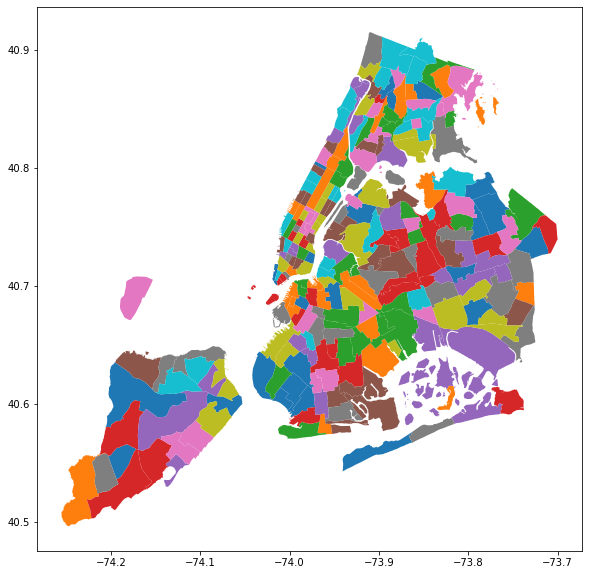

In [38]:
#plot the Geodataframe
ax=taxi_zones.plot(column="zone",figsize=(10,10))

#if there is more than one geodataframe we can plot them side by side. to do this we need advanced matplotlip function evnthough
#basic function come with the geodapandas  import matplotlib.pyplot as plt (source an absolute Beginner's guide to Geopandas)
#area_of interest and districts are two different geodataframe

#plot them side by side 
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(10,8))   #figsize is optinal
districs.plot(ax=ax1,cmap="jet",edgecolor="red",columns="distric")  #there are alot option for cmap="hsv","rgb" etc.
area_of_interest.plot(ax=ax2,color="gren")

#plotting one under the other
just change ncols=2 to nrows=2

#plotting multiple layers(birini diğerinin üstüne tabaka halinde yazdırma)
make sure to equal ax variable, it will be enough if ı just delete ax1 and ax2 variables

fig,(ax)=plt.subplots(figsize=(10,8))   #figsize is optinal
districs.plot(ax,cmap="jet",edgecolor="red",columns="distric")  #there are alot option for cmap="hsv","rgb" etc.
area_of_interest.plot(ax,color="gren")

if ı wantto make hollow inside of polygon area:
area_of_interest.plot(ax,color="none",edgecolor="black")

REPROJECTING GEOPANDAS GEODATAFRAMES
districts=districts.to_crs(epsg="32629")
districts.plot(figsize=(10,8))
#plotting and reprojecting multiple layers(birini diğerinin üstüne tabaka halinde yazdırma)
fig,ax=plt.subplot(figsize=(10,8))
districts=districts.to_crs(epsg="32629")
districts.plot(ax=axfigsize(10,8),cmap="hsv",edgecolor="black",column="districts")
area_of_interest=area_of_interest.to_crs(epsg="32629")
area_of_interest.plot(ax=ax,figsize=(10,8),color="none",edgecolor="black")

GEOPROCESSING (intersecting Layers)
districts_in_aoi = gpd.overlay(districts,area_of_interest, how= "intersection")
districts_in_aoi.plot(edgecolor = 'red')

# Calculating the areas of the intersected layer 
districts_in_aoi['area'] = districts_in_aoi.area/1000000

# Exporting GeoPandas GeoDataFrames into an ESRI Shapefile
districts_in_aoi.to_file('districts_within_aoi.shp', driver = "ESRI Shapefile")





In [53]:
#spatial Joins (3 steps)  page27
#1.Dataframedeki enlem ve boylam bilgilerini kullanarak (nokta geometrisi) GEODATAFRAME oluşturmaar
#2.Perform a spatial joint between the point and the taxi zones(polygon geometry )
#3.Return the location id  of the taxi zone for each coordinate

from shapely.geometry import Point

def assign_taxi_zones(df, lon_var, lat_var, locid_var):

    try:
        
        #1.Dataframedeki enlem ve boylam bilgilerini kullanarak (nokta geometrisi) GEODATAFRAME oluşturma
        local_gdf = gpd.GeoDataFrame(
            crs={'init': 'epsg:4326'},
            geometry=[Point(xy) for xy in
                      zip(df[lon_var], df[lat_var])])
        #2.Perform a spatial joint between the point and the taxi zones(polygon geometry )
        local_gdf = gpd.sjoin(
            local_gdf, taxi_zones, how='left', op='within')

        #3.Return the location id  of the taxi zone for each coordinate
        return local_gdf.LocationID.rename(locid_var)
    except ValueError as ve:
        print(ve)
        print(ve.stacktrace())
        series = np.nan
        return series

In [60]:
#calculate pick up and dropoff taxi zones ids
df["pickup_taxizone_id"]=assign_taxi_zones(df,"Pickup_longitude","Pickup_latitude","pickup_taxizone_id")

/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [61]:
df["dropoff_taxizone_id"]=assign_taxi_zones(df,"Pickup_longitude","Pickup_latitude","dropoff_taxizone_id")

/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [63]:
df.sample()

,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Trip_distance,PULocationID,DOLocationID,trip_duration,lpep_pickup_datetimeYear,lpep_pickup_datetimeMonth,...,lpep_pickup_datetimeIs_quarter_start,lpep_pickup_datetimeIs_year_end,lpep_pickup_datetimeIs_year_start,lpep_pickup_datetimeHour,lpep_pickup_datetimeMinute,lpep_pickup_datetimeSecond,lpep_pickup_datetimeElapsed,pickup_taxi_zone_id,pickup_taxizone_id,dropoff_taxizone_id
2260159,-73.940704,40.711811,-73.928299,40.695118,1.42,NaN,NaN,6.120297,2016,2,...,False,False,False,21,17,14,1.455657e+09,80.0,80.0,80.0


Remember, this operation will only assign a taxi zone that we know the coordinates of.
To backfill the missing coordinates with the centroid of the taxi zone, we can follow these steps:
1. Find the centroid of each taxi zone
2. Join the DataFrame with the taxi zones based on the pickup zone ID that we just
computed (pickup_taxizone_id)
3. Transfer the taxi zone's centroid to the DataFrame
4. For all rows with missing pickup coordinates, substitute the centroid values
5. Apply the same process in order to backfill missing dropoff coordinates
The following lines of code illustrate this process:

In [65]:
#1. Finding Taxi Zone' Centroid
taxi_zones["X"] = taxi_zones.centroid.x
taxi_zones["Y"] = taxi_zones.centroid.y

<ipython-input-65-3fc2b439e6b9>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  taxi_zones["X"] = taxi_zones.centroid.x
<ipython-input-65-3fc2b439e6b9>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  taxi_zones["Y"] = taxi_zones.centroid.y


In [67]:
taxi_zones.head(1)

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,X,Y
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((-74.18445 40.69500, -74.18449 40.69510, -74.18450 40.69519, -74.18438 40.69588, -74.18428 40.69621, -74.18402 40.69708, -74.18391 40.69751, -74.18375 40.69780, -74.18363 40.69833, -74.18356 40.69845, -74.18354 40.69856, -74.18351 40.69870, -74.18327 40.70009, -74.18316 40.70122, -74.18317 40.70239, -74.18314 40.70263, -74.18309 40.70285, -74.18299 40.70316, -74.18284 40.70347, -74.18264 40.70374, -74.18243 40.70395, -74.18220 40.70414, -74.18203 40.70426, -74.18181 40.70439, -74.18157 40.70450, -74.18132 40.70461, -74.18081 40.70479, -74.17947 40.70535, -74.17887 40.70554, -74.17...",-74.174,40.691831


In [68]:
df.columns

Index(['Pickup_longitude', 'Pickup_latitude', 'Dropoff_longitude',
       'Dropoff_latitude', 'Trip_distance', 'PULocationID', 'DOLocationID',
       'trip_duration', 'lpep_pickup_datetimeYear',
       'lpep_pickup_datetimeMonth', 'lpep_pickup_datetimeWeek',
       'lpep_pickup_datetimeDay', 'lpep_pickup_datetimeDayofweek',
       'lpep_pickup_datetimeDayofyear', 'lpep_pickup_datetimeIs_month_end',
       'lpep_pickup_datetimeIs_month_start',
       'lpep_pickup_datetimeIs_quarter_end',
       'lpep_pickup_datetimeIs_quarter_start',
       'lpep_pickup_datetimeIs_year_end', 'lpep_pickup_datetimeIs_year_start',
       'lpep_pickup_datetimeHour', 'lpep_pickup_datetimeMinute',
       'lpep_pickup_datetimeSecond', 'lpep_pickup_datetimeElapsed',
       'pickup_taxi_zone_id', 'pickup_taxizone_id', 'dropoff_taxizone_id'],
      dtype='object')

In [70]:
#2. Join dataframe with taxizone based on pickup zone id
df = pd.merge(df, taxi_zones[["LocationID","X", "Y"]], how = "left",
left_on = "PULocationID", right_on = "LocationID")

In [72]:
df.head(1)

,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Trip_distance,PULocationID,DOLocationID,trip_duration,lpep_pickup_datetimeYear,lpep_pickup_datetimeMonth,...,lpep_pickup_datetimeHour,lpep_pickup_datetimeMinute,lpep_pickup_datetimeSecond,lpep_pickup_datetimeElapsed,pickup_taxi_zone_id,pickup_taxizone_id,dropoff_taxizone_id,LocationID,X,Y
0,-73.928642,40.680611,-73.924278,40.698044,1.46,NaN,NaN,6.418365,2016,1,...,0,29,24,1.451608e+09,61.0,61.0,61.0,NaN,NaN,NaN


In [73]:
#3.Substitute missing lat/long values w/
# the taxi zone's centroid
df.Pickup_longitude.fillna(df.X, inplace=True)
df.Pickup_latitude.fillna(df.Y, inplace=True)

In [74]:
df.drop(columns=["LocationID", "X", "Y"], inplace=True)

In [76]:
#5. Apply same process for Dropoff zone
df = pd.merge(df, taxi_zones[["LocationID","X", "Y"]], how = "left",
    left_on = "DOLocationID", right_on = "LocationID")
df.Dropoff_longitude.fillna(df.X, inplace=True)
df.Dropoff_latitude.fillna(df.Y, inplace=True)
df.drop(columns=["LocationID", "X", "Y"], inplace=True)
df.tail().T

,5997513,5997514,5997515,5997516,5997517
Pickup_longitude,-73.944298,-73.939056,-73.939445,-73.923767,-73.90255
Pickup_latitude,40.803108,40.805237,40.805706,40.754566,40.753708
Dropoff_longitude,-73.948586,-73.948586,-73.944702,-73.873993,-73.858955
Dropoff_latitude,40.789127349853516,40.782333374023438,40.779571533203125,40.757366180419922,40.7{
Trip_distance,1.22,0.0,0.0,3.02,NaN
PULocationID,NaN,NaN,NaN,NaN,NaN
DOLocationID,NaN,NaN,NaN,NaN,NaN
trip_duration,6.021023,6.519147,6.50129,7.012115,6.854355
lpep_pickup_datetimeYear,2016,2016,2016,2016,2016
lpep_pickup_datetimeMonth,4,4,4,4,4


In [77]:
#Orthodrome eğrisi küre üzerinde iki nokta arası uzaklığın bulunması
def haversine(lat1,lon1,lat2,lon2):
    R=3958.76 #Earth radius in miles
    dLat=np.radians(lat2-lat1)
    dLon=np.radians(lon2-lon1)
    #np.radians(180)=pi=3.14 dereceyi radyana dönüştürür.
    a=np.sin(dLat/2)**2+np.cos(lat1)*np.cos(lat2)*np.sin(dLon/2)**2
    c=2*np.arcsin(np.sqrt(a))
    return R*c

In [ ]:
son partı anlamadım ve burda bırakıyorum